In [178]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import pickle

In [179]:
import matplotlib
matplotlib.style.use('publication23')

In [180]:
qrange = linspace(0, 5, 51)
omrange = linspace(-5, 5, 401)

In [181]:
q = Particle(0.5, qrange, omrange)

In [182]:
T = 0.2
G0 = 7
G1 = 8

In [183]:
ch0 = Channel(q, q, T, l=0, G=G0)
ch1 = Channel(q, q, T, l=1, G=G1)

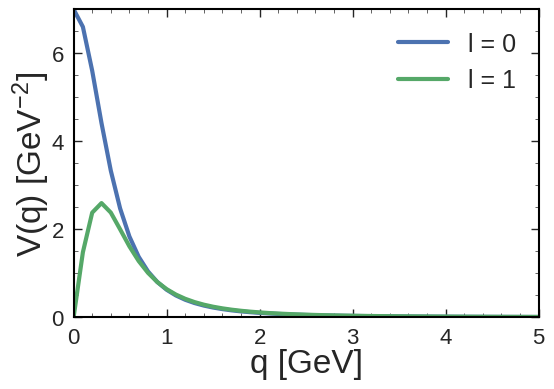

In [190]:
plt.plot(qrange, ch0.v(qrange), label='l = 0')
plt.plot(qrange, ch1.v(qrange), label='l = 1')

plt.xlabel('q [GeV]')
plt.ylabel('V(q) [GeV$^{-2}$]')
plt.legend()

plt.savefig('Vq_l=1.pdf', bbox_inches='tight')

In [185]:
ch0.populate_T()
ch1.populate_T()

In [186]:
ch1.populate_T()

(0.0, 1.5)

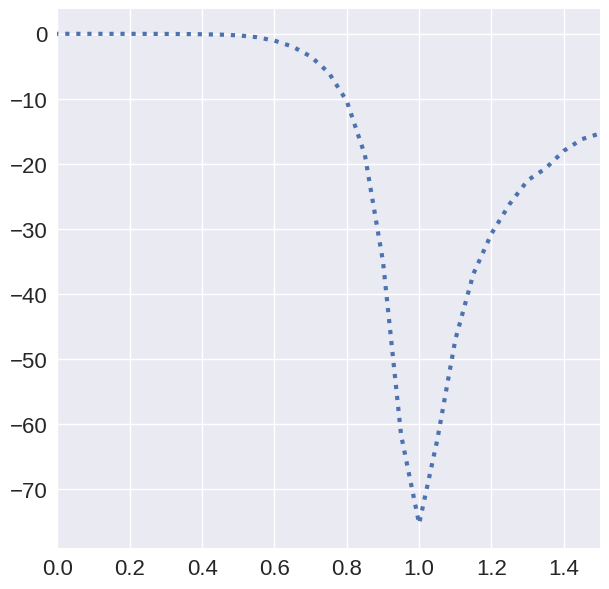

In [99]:
plt.plot(omrange, imag(ch1.TM[:, 1]), ls=':')
# plt.plot(omrange, imag(ch0.TM[:, 1]))

plt.xlim(0, 1.5)

## Find peak position in non-selfconsistent calc

In [143]:
Grange = linspace(12, 3, 20)

In [144]:
from scipy.optimize import minimize

In [145]:
ch1.TM[:, 0]

array([ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+

In [146]:
ch1 = Channel(q, q, T, l=1, G=12)
ch1.populate_T()


In [147]:
ch1.TM.shape

(401, 51)

In [148]:
iT = interp1d(omrange, imag(ch1.TM[:, 10]), kind='cubic')

x = minimize(iT, 1.0)


In [197]:
peaks = []

Ts = []

for G1 in tqdm.tqdm(Grange):
    ch1 = Channel(q, q, T, l=1, G=G1)
    ch1.populate_T()
    j = 5
    Ts += [ch1.TM[:, j]]
    iT = interp1d(omrange, imag(ch1.TM[:, j]), kind='cubic')

    x = minimize(iT, 1.0)

    peaks += [x.x]


  0%|          | 0/20 [00:00<?, ?it/s]

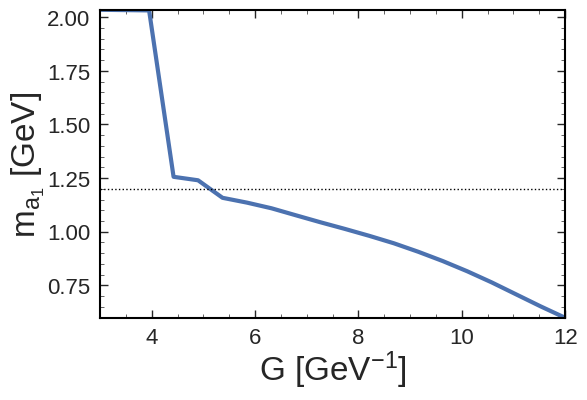

In [198]:
plt.plot(Grange, peaks)

plt.xlabel('G [GeV$^{-1}$]')
plt.ylabel('$m_{a_1}$ [GeV]')

plt.axhline(1.2, ls=':', lw=1, c='black')

plt.savefig('m_a1.pdf', bbox_inches='tight')

(0.0, 2.5)

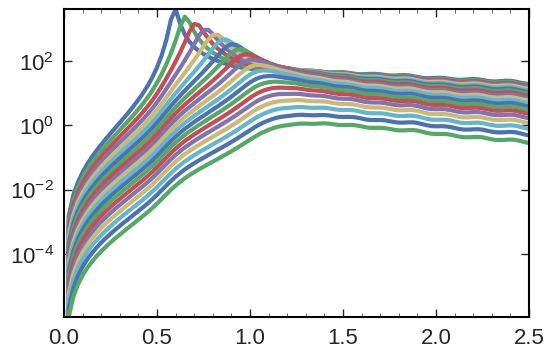

In [199]:
for t in Ts:
    plt.plot(omrange, -imag(t))

plt.semilogy()

plt.xlim(0, 2.5)

(0.0, 2.0)

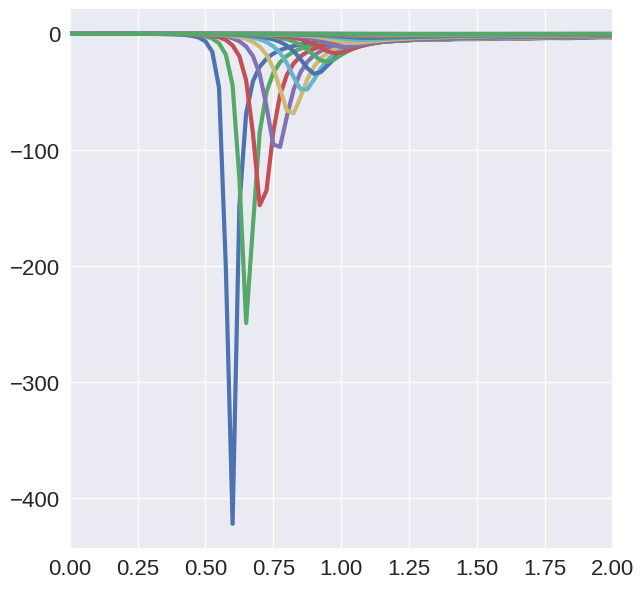

In [170]:
for t in Ts:
    plt.plot(omrange, imag(t))

# plt.semilogy()

plt.xlim(0, 2)

## Test the $\Sigma$ 

In [159]:
ch1.populate_S()

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [160]:
ch0.populate_S()

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

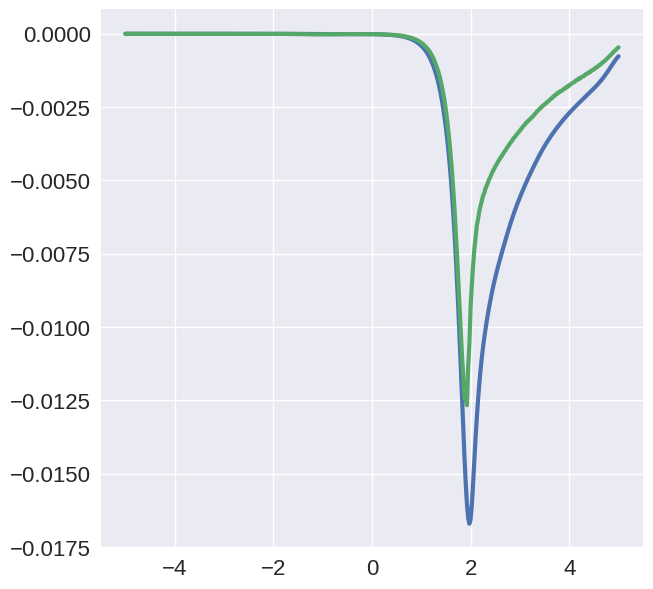

In [165]:
plt.plot(omrange, 3*ch1.ImS[:, 20])
plt.plot(omrange, ch0.ImS[:, 20])

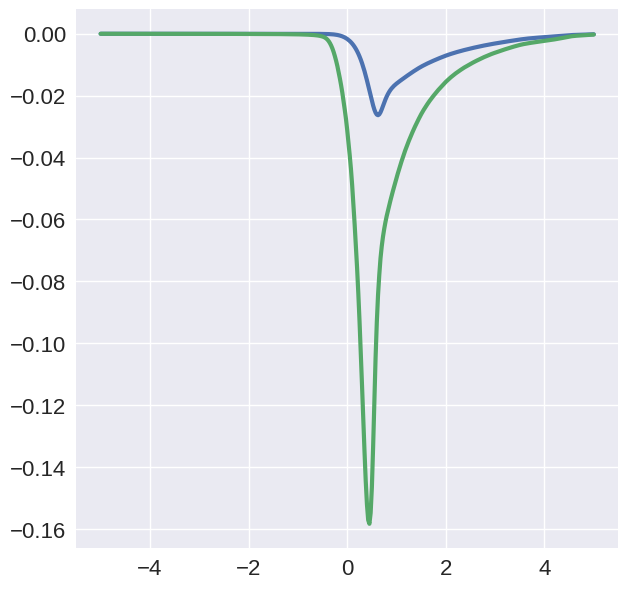

In [166]:
j = 5
plt.plot(omrange, ch1.ImS[:, j])
plt.plot(omrange, ch0.ImS[:, j])

In [167]:
qrange[j]

0.5